# Ансамбли моделей машинного обучения

Цель лабораторной работы: изучение ансамблей моделей машинного обучения.

## Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
    1. одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
    2. одну из моделей группы бустинга;
    3. одну из моделей группы стекинга.    
5. (+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:
    1. Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
    2. Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.    
6. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

## Ход работы

### Выбор и загрузка датасета

In [2]:
# %matplotlib inline
# sns.set(style="ticks")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import gmdhpy
from sklearn.datasets import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
# from heamy.estimator import Classifier
# from heamy.pipeline import ModelsPipeline
# from heamy.dataset import Dataset
from sklearn.metrics import accuracy_score
# from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from operator import itemgetter

def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

wine = load_wine()

df = make_dataframe(load_wine)

In [3]:
# Первые 5 строк датасета
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [5]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


### Разделение на тестовую и обучающую выборки

In [6]:
y = df['target']
x = df.drop('target', axis = 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.4, random_state = 0)

print(f"Обучающая выборка:\n{x_train, y_train}")
print(f"Тестовая выборка:\n{x_test, y_test}")

Обучающая выборка:
(array([[0.58157895, 0.64031621, 0.4973262 , ..., 0.27642276, 0.63369963,
        0.28673324],
       [0.80789474, 0.28063241, 0.5026738 , ..., 0.62601626, 0.6959707 ,
        0.87874465],
       [0.15263158, 0.12055336, 0.71657754, ..., 0.3902439 , 0.72893773,
        0.28673324],
       ...,
       [0.36578947, 0.17193676, 0.44385027, ..., 0.47154472, 0.61904762,
        0.04778887],
       [0.75526316, 0.18577075, 0.40641711, ..., 0.3495935 , 0.75457875,
        0.5042796 ],
       [0.82368421, 0.34980237, 0.59893048, ..., 0.11382114, 0.16117216,
        0.2724679 ]]), 43     0.0
10     0.0
109    1.0
73     1.0
171    2.0
      ... 
103    1.0
67     1.0
117    1.0
47     0.0
172    2.0
Name: target, Length: 106, dtype: float64)
Тестовая выборка:
(array([[0.71315789, 0.18379447, 0.47593583, 0.29896907, 0.52173913,
        0.55862069, 0.54008439, 0.1509434 , 0.38170347, 0.38993174,
        0.35772358, 0.70695971, 0.55777461],
       [0.46315789, 0.38142292, 0.5989

### Бэггинг

In [7]:
# Обучим классификатор на 5 деревьях
bc = BaggingClassifier(n_estimators=5, oob_score=True, random_state=10)
bc_prediction = bc.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


### Градиентный бустинг

In [8]:
gb = GradientBoostingClassifier(random_state=0)
gb_prediction = gb.fit(x_train, y_train).predict(x_test)

### Стекинг

In [9]:
# Качество отдельных моделей
def val_mae(model):
    st_prediction = model.fit(x_train, y_train).predict(x_test)
#     y_pred = model.predict(boston_X_test)
#     result = mean_absolute_error(boston_y_test, y_pred)
    print(model)
    print('Accuracy score={}'.format(accuracy_score(y_test, st_prediction)))

In [10]:
# Точность на отдельных моделях
for model in [
    DecisionTreeClassifier(random_state=0),
    svm.SVC(random_state=0),
    LogisticRegression(random_state=0)
]:
    val_mae(model)
    print('==========================')
    print()

DecisionTreeClassifier(random_state=0)
Accuracy score=0.9166666666666666

SVC(random_state=0)
Accuracy score=0.9722222222222222

LogisticRegression(random_state=0)
Accuracy score=0.9583333333333334



In [11]:
# Первый уровень - две модели: дерево и метод опорных векторов
# Второй уровень: логистическая регрессия

estimators = [
    ('dt', DecisionTreeClassifier(random_state=0)),
    ('svc', svm.SVC(random_state=0))
]

sc = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
sc_prediction = sc.fit(x_train, y_train).predict(x_test)

### Многослойный персептрон

In [12]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
mlp_prediction = mlp.fit(x_train, y_train).predict(x_test)

### Оценка качества решений

In [13]:
print("Бэггинг: ", accuracy_score(y_test, bc_prediction))
print("Градиентный бустинг: ", accuracy_score(y_test, gb_prediction))
print("Стекинг (дерево и метод опорных векторов + логистическая регрессия): ", accuracy_score(y_test, sc_prediction))
print("Многослойный персептрон: ", accuracy_score(y_test, mlp_prediction))

Бэггинг:  0.8611111111111112
Градиентный бустинг:  0.9305555555555556
Стекинг (дерево и метод опорных векторов + логистическая регрессия):  0.9722222222222222
Многослойный персептрон:  0.9444444444444444


Бэггинг:  0.8611111111111112


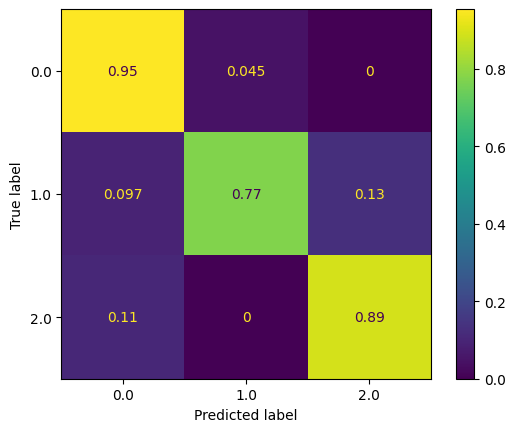

In [14]:
print("Бэггинг: ", accuracy_score(y_test, bc_prediction))

cm = confusion_matrix(y_test, bc_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Градиентный бустинг:  0.9305555555555556


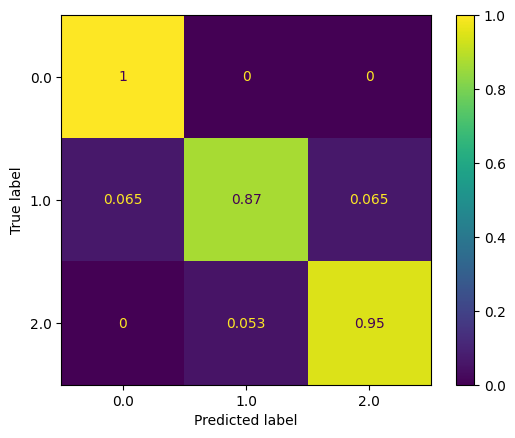

In [15]:
print("Градиентный бустинг: ", accuracy_score(y_test, gb_prediction))

cm = confusion_matrix(y_test, gb_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Стекинг (дерево и метод опорных векторов + логистическая регрессия):  0.9722222222222222


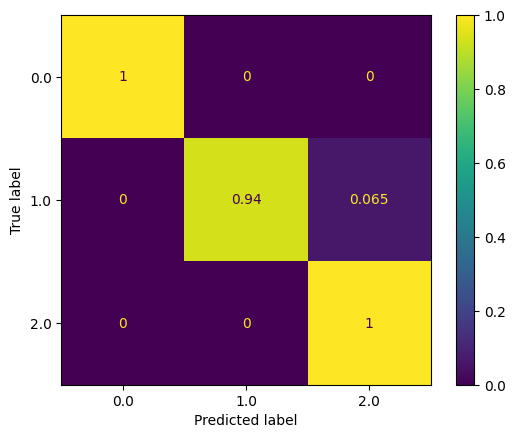

In [16]:
print("Стекинг (дерево и метод опорных векторов + логистическая регрессия): ", accuracy_score(y_test, sc_prediction))

cm = confusion_matrix(y_test, sc_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()

Многослойный персептрон:  0.9444444444444444


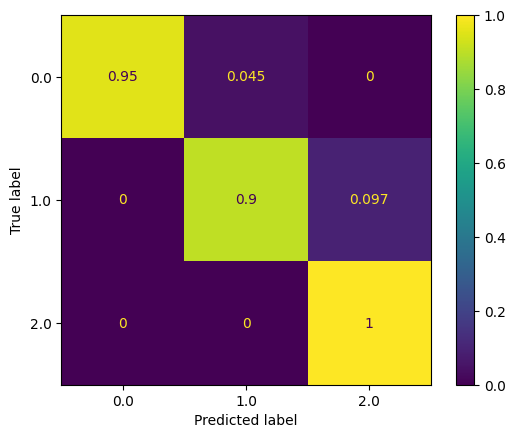

In [17]:
print("Многослойный персептрон: ", accuracy_score(y_test, mlp_prediction))

cm = confusion_matrix(y_test, mlp_prediction, labels=np.unique(df.target), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(df.target))
disp.plot()